### Линейная регрессия

Небольшой пример

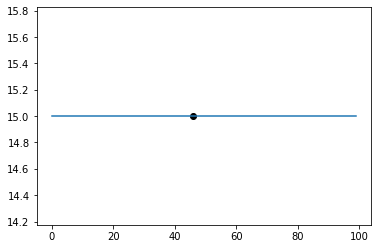

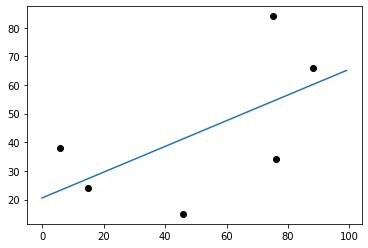

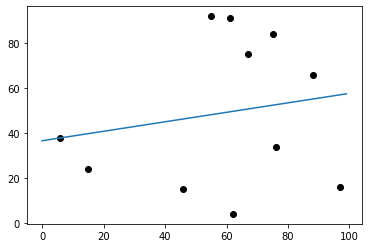

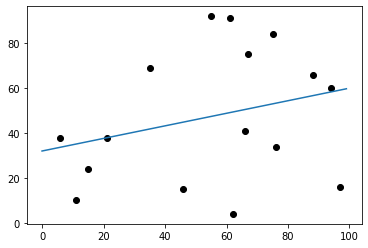

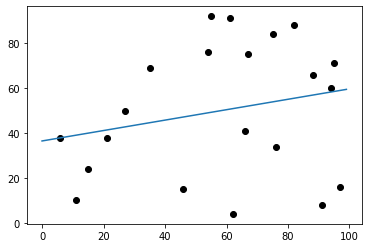

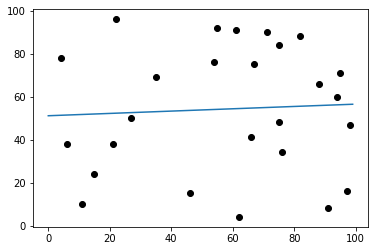

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import random

reg = LinearRegression()

x_values = []
y_values = []

for i in range(30):
    x_values.append(random.randint(0, 100))
    y_values.append(random.randint(0, 100))

    x = np.array(x_values)
    x = x.reshape(-1, 1)

    y = np.array(y_values)
    y = y.reshape(-1, 1)

    if i % 5 == 0:
        plt.clf()
        reg.fit(x, y)
        # plt.xlim(0, 100) # уставливает лимит на количество точек осей
        # plt.ylim(0, 100) #
        plt.scatter(x_values, y_values, color='black') # создает точку

        reg_line = reg.predict(np.array([x for x in range(100)]).reshape(-1, 1))
        plt.plot(list(range(100)), reg_line)
        plt.pause(0.01)

plt.show()

### Градиентный спуск

Градиентный спуск — самый используемый алгоритм обучения, он применяется почти в каждой модели машинного обучения. Градиентный спуск — это, по сути, и есть то, как обучаются модели. Без ГС машинное обучение не было бы там, где сейчас.

Градиентный спуск — метод нахождения минимального значения функции потерь (существует множество видов этой функции). Минимизация любой функции означает поиск самой глубокой впадины в этой функции. Имейте в виду, что функция используется, чтобы контролировать ошибку в прогнозах модели машинного обучения. Поиск минимума означает получение наименьшей возможной ошибки или повышение точности модели. Мы увеличиваем точность, перебирая набор учебных данных при настройке параметров нашей модели (весов и смещений).

Итак, градиентный спуск нужен для минимизации функции потерь.

Суть алгоритма – процесс получения наименьшего значения ошибки. Аналогично это можно рассматривать как спуск во впадину в попытке найти золото на дне ущелья (самое низкое значение ошибки).

В дальнейшем, чтобы найти самую низкую ошибку (глубочайшую впадину) в функции потерь (по отношению к одному весу), нужно настроить параметры модели. Как мы их настраиваем? В этом поможет математический анализ. Благодаря анализу мы знаем, что вектор градиент указывает направление скорейшего возрастания функции. Следовательно отрицательный вектор градиент покажет в какую сторону нам предстоит двигаться. (Напомним, что вектор градиент - это вектор частных производных функции)

Так как признаки у нас постоянны, несложно догадаться, что мы будем минимизировать именно их веса. Эта минимизация будет иметь вид:

$$w^{(t+1)} = w^t - \eta \sum_{i = 0}^{n}\nabla L_i(w^t),$$

где

* $L_i$ - функция потерь на i элементе выборки,
* $w^t$ - веса модели на предыдущем шаге,
* $w^{t+1}$ - веса модели на текущем шаге,
* $n$ - количество элементов в выборке, смысл которого заключается в том, насколько сильно менять вектор весов в направлении градиента,
* $\eta$ - шаг спуска.

#### Несколько нюансов:
* На самом нулевом шаге берется произвольная точка, т. е. веса функции задаются рандомно, из которой и начинается спуск к минимуму.
* Если взять шаг слишком маленьким, то велика вероятность попасть в локальный минимум, вместо поиска глобального, а если положить шаг слишком большим можно не найти даже его и бесцельно "шататься" от одной случайной точки к другой. Поэтому обычно шаг уменьшают на каждой итерации. Один из способов этого достигнуть: взять шаг как $\frac{1}{t}$.
* Существует несколько способов остановки. Самый лучший из них - итеративный. Задается гиперпараметр, определяющий колличество эпох, после чего спуск сделает столько шагов, сколько мы и задали. Этот параметр очень полезен для человека, который после обучения может посмотреть значение loss фунции на трейн и валидационной выборке, и найти оптимальное количество шагов, на которых модель хорошо обучилась и хорошо может обобщать трейн данные.
* Градиентный спуск все еще слишком медленный, хоть и работает быстрее МНК, поэтому классическая версия алгоритма практически не используется, в отличии от его модификаций.

### Модификации алгоритма:

* Стохастический градиентный спуск (англ. Stochastic gradient descent, SGD). Вместо пересчета вектора градиента на
  каждом экземпляре выборки, берется один случайный экземпляр и относительно него пересчитываются веса модели. Из-за
  этого нужно больше итераций, а вместо плавного спуска весь процесс можно описать как "движение пьяницы в кабак", но в
  отличии от него SGD достигает своей цели. Работает в разы быстрее обычного GD.
* Mini-batch ГС. Смесь обычного GD и SGD. Вся выборка делится на несколько частей заданной длины, называемой batch и при
  обучении берется случайный батч, по которому и вычисляется сумма векторов градиентов.

Онлайн-подход к обучению 

Стохастический градиентный спуск, будучи одним из методов оптимизации, дает вполне практическое руководство к обучению алгоритмов классификации и регрессии на больших выборках – до сотен гигабайт (в зависимости от имеющейся памяти).


В случае парной регрессии, который мы рассмотрели, на диске можно хранить обучающую выборку $(X,y)$ и, не загружая ее в оперативную память (она может попросту не поместиться), считывать объекты по одному и обновлять веса:


$$\begin{array}{rcl} w_0^{(t+1)} = w_0^{(t)} + \eta (y_i - w_0^{(t)} - w_1^{(t)}x_i) \end{array}$$

$$\begin{array}{rcl} w_1^{(t+1)} = w_1^{(t)} + \eta (y_i - w_0^{(t)} - w_1^{(t)}x_i)x_i \end{array}$$


После обработки всех объектов обучающей выборки, функционал, который мы оптимизируем (квадратичная ошибка в задаче регрессии или, например, логистическая – в задаче классификации) снизится, но часто нужно несколько десятков проходов по выборке, чтобы он снизился достаточно.

Для того чтобы явно представлять себе этот самый "спуск", можно обратиться к открытому репозиторию, в котором представлены визуализации минимизации функции потерь с помощью различных оптимизаторов (включая GD):

https://github.com/Jaewan-Yun/optimizer-visualization

### Логистическая регрессия
Основная идея линейного классификатора заключается в том, что признаковое пространство может быть разделено гиперплоскостью на два полупространства, в каждом из которых прогнозируется одно из двух значений целевого класса. Это пример дискриминативной модели.

Если это можно сделать без ошибок, то обучающая выборка называется линейно разделимой.

Логистическая регрессия является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность отношения объекта к тому или иному классу.

Прогнозирование не просто ответа ("+1" или "-1"), а именно вероятности отнесения к классу "+1" во многих задачах является очень важным бизнес-требованием. Например, в задаче кредитного скоринга, где традиционно применяется логистическая регрессия, часто прогнозируют вероятность невозврата кредита ($p_+$). Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — по сути, рейтинг клиентов от плохих к хорошим.

Банк выбирает для себя порог $p_*$ предсказанной вероятности невозврата кредита и начиная с этого значения уже не выдает кредит. Более того, можно умножить предсказанную вероятность на выданную сумму и получить матожидание потерь с клиента, что тоже будет хорошей бизнес-метрикой.

Итак, мы хотим прогнозировать вероятность $p_+ \in [0,1]$, а пока умеем строить линейный прогноз с помощью МНК: $b(\vec{x}) = \vec{w}^T \vec{x} \in \mathbb{R}$. Каким образом преобразовать полученное значение в вероятность, пределы которой – [0, 1]? Очевидно, для этого нужна некоторая функция $f: \mathbb{R} \rightarrow [0,1].$ В модели логистической регрессии для этого берется конкретная функция: $\sigma(z) = \frac{1}{1 + \exp^{-z}}$. И сейчас разберемся, каковы для этого предпосылки.

Обозначим $P(X)$ вероятностью происходящего события $X$. Тогда отношение вероятностей $OR(X)$ определяется из $\frac{P(X)}{1-P(X)}$, а это — отношение вероятностей того, произойдет ли событие или не произойдет. Очевидно, что вероятность и отношение шансов содержат одинаковую информацию. Но в то время как $P(X)$ находится в пределах от 0 до 1, $OR(X)$ находится в пределах от 0 до $\infty$.


Если вычислить логарифм $OR(X)$ (то есть называется логарифм шансов, или логарифм отношения вероятностей), то легко заметить, что $\log{OR(X)} \in \mathbb{R}$. Его-то мы и будем прогнозировать с помощью МНК.

Посмотрим, как логистическая регрессия будет делать прогноз $p_+ = P\left(y_i = 1 \mid \vec{x_i}, \vec{w}\right)$.

Шаг 1. Вычислить значение $w_{0}+w_{1}x_1 + w_{2}x_2 + ... = \vec{w}^T\vec{x}$. (уравнение $\vec{w}^T\vec{x} = 0$ задает гиперплоскость, разделяющую примеры на 2 класса);


Шаг 2. Вычислить логарифм отношения шансов: $ \log(OR_{+}) = \vec{w}^T\vec{x}$.


Шаг 3. Имея прогноз шансов на отнесение к классу "+" – $OR_{+}$, вычислить $p_{+}$ с помощью простой зависимости:

$$\large p_{+} = \frac{OR_{+}}{1 + OR_{+}} = \frac{\exp^{\vec{w}^T\vec{x}}}{1 + \exp^{\vec{w}^T\vec{x}}} = \frac{1}{1 + \exp^{-\vec{w}^T\vec{x}}} = \sigma(\vec{w}^T\vec{x})$$

В правой части мы получили как раз сигмоид-функцию.


Итак, логистическая регрессия прогнозирует вероятность отнесения примера к классу "+" (при условии, что мы знаем его признаки и веса модели) как сигмоид-преобразование линейной комбинации вектора весов модели и вектора признаков примера:


$$\large p_+(x_i) = P\left(y_i = 1 \mid \vec{x_i}, \vec{w}\right) = \sigma(\vec{w}^T\vec{x_i}). $$

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# информация о наборе данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


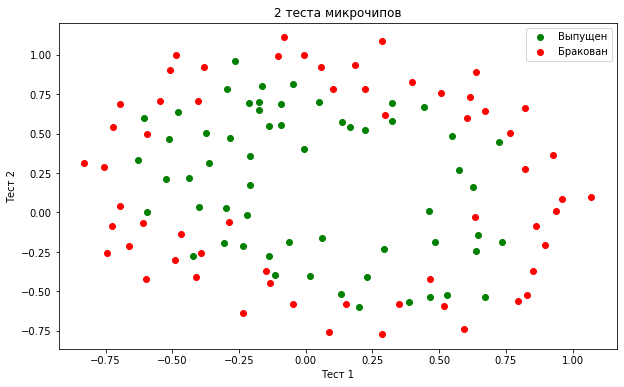

In [3]:
X = data[['test1', 'test2']].values
y = data['released'].values

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [11]:
# Функция отображения кривой классификации
def plot_boundary(clf, X, y, grid_step=.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
    np.arange(y_min, y_max, grid_step))

    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

Доля правильных ответов классификатора на обучающей выборке: 0.627


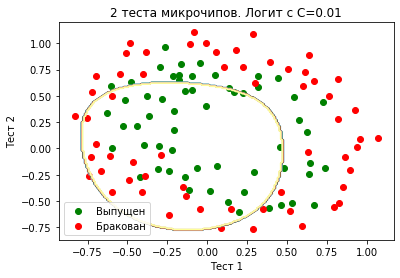

In [12]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.01, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов. Логит с C=0.01')
plt.legend();

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

Доля правильных ответов классификатора на обучающей выборке: 0.831


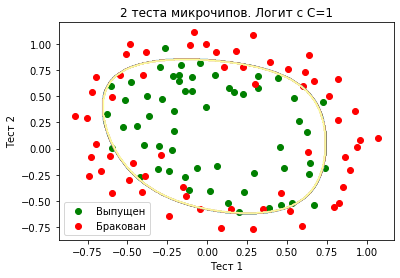

In [19]:
C = 1
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X_poly, y)

plot_boundary(logit, X, y, grid_step=.005, poly_featurizer=poly)

plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', label='Выпущен')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title(f'2 теста микрочипов. Логит с C={C}')
plt.legend()

print("Доля правильных ответов классификатора на обучающей выборке:", 
round(logit.score(X_poly, y), 3))

### Регуляризация

#### Регуляризация линейной регрессии

Иногда бывают ситуации, когда мы намеренно увеличиваем смещенность модели ради ее стабильности, т.е. ради уменьшения
дисперсии модели $\text{Var}\left(\hat{f}\right)$.

Одним из условий теоремы Маркова-Гаусса является полный столбцовый ранг матрицы $X$. В противном случае решение МНК
$\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$ не существует, т.к. не будет существовать обратная матрица $\left(X^T
X\right)^{-1}.$ Другими словами, матрица $X^T X$ будет сингулярна, или вырожденна. Такая задача называется **некорректно
поставленной**.

Задачу нужно скорректировать, а именно, сделать матрицу $X^TX$ невырожденной, или регулярной (именно поэтому этот
процесс называется **регуляризацией**). Чаще в данных мы можем наблюдать так называемую мультиколлинеарность — когда два
или несколько признаков сильно коррелированны, в матрице $X$ это проявляется в виде "почти" линейной зависимости
столбцов.

Например, в задаче прогнозирования цены квартиры по ее параметрам "почти" линейная зависимость будет у признаков
"площадь с учетом балкона" и "площадь без учета балкона". Формально для таких данных матрица $X^T X$ будет обратима, но
из-за мультиколлинеарности у матрицы $X^T X$ некоторые собственные значения будут близки к нулю, а в обратной матрице
$\left(X^T X\right)^{-1}$ появятся экстремально большие собственные значения, т.к. собственные значения обратной матрицы
– это $\frac{1}{\lambda_i}$.

##### $L_2$-регуляризация

Итогом такого шатания собственных значений станет нестабильная оценка параметров модели, т.е. добавление нового
наблюдения в набор тренировочных данных приведёт к совершенно другому решению. Одним из способов регуляризации является
регуляризация Тихонова, которая в общем виде выглядит как добавление нового члена к среднеквадратичной ошибке:

$\large \begin{array}{rcl} \mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w}
\right\|_2^2 + \left\|\Gamma \vec{w}\right\|^2\\ \end{array}$

Часто матрица Тихонова выражается как произведение некоторого числа на единичную матрицу: $\Gamma = \frac{\lambda}{2}
E$. В этом случае задача минимизации среднеквадратичной ошибки становится задачей с ограничением на $L_2$ норму. Если
продифференцировать новую функцию стоимости по параметрам модели, приравнять полученную функцию к нулю и выразить
$\vec{w}$, то мы получим точное решение задачи.

$$\large \begin{array}{rcl} \vec{w} &=& \left(X^T X + \lambda E\right)^{-1} X^T \vec{y} \end{array}$$

Такая регрессия называется **гребневой регрессией** (ridge regression). А гребнем является как раз диагональная матрица, которую мы прибавляем к матрице $X^T X$, в результате получается гарантированно регулярная матрица.

![Гребень](1.png)

Такое решение уменьшает дисперсию, но становится смещенным, т.к. минимизируется также и норма вектора параметров, что заставляет решение сдвигаться в сторону нуля.

##### $L_2$-регуляризация логистических потерь

L2-регуляризация логистической регрессии устроена почти так же, как и в случае с гребневой (Ridge регрессией). Вместо функционала $\mathcal{L_{log}} (X, \vec{y}, \vec{w})$ минимизируется следующий:


$$\large J(X, \vec{y}, \vec{w}) = \mathcal{L_{log}} (X, \vec{y}, \vec{w}) + \lambda |\vec{w}|^2$$


В случае логистической регрессии принято введение обратного коэффициента регуляризации $C = \frac{1}{\lambda}$. И тогда решением задачи будет


$$\large \hat{w} = \arg \min_{\vec{w}} J(X, \vec{y}, \vec{w}) = \arg \min_{\vec{w}}\ (C\sum_{i=1}^{\ell} \log (1 + \exp^{-y_i\vec{w}^T\vec{x_i}})+ |\vec{w}|^2)$$


Далее рассмотрим пример, позволяющий интуитивно понять один из смыслов регуляризации.

##### Че за лямбда...

Член $\lambda$ называется параметром сглаживания. Он балансирует кросс-энтропийную функцию ошибок и регуляризационный штраф. Если значение $\lambda$ велико, весовые коэффициенты будут стремиться к нулю, если же значение $\lambda$ мало или равно нулю, то весовые коэффициенты будут просто стремиться к минимизации кросс-энтропийной функции ошибок. Как правило, значение параметра $\lambda$ устанавливают $0,1$ или $1$, или в районе между этими значениями, но в основном его значение зависит от конкретных данных. Вам нужно попробовать разные значения и понаблюдать за поведением функции затрат и конечным результатом. Не существует универсальной методики определения значения параметра $\lambda$. 

#### $L_1$-регуляризация

Если брать ситуацию из прошлых примеров (где обсуждается взаимосвязь и необходимость обработать сильнокоррелирующие
признаки), мы можем из всего массива факторов отобрать лишь небольшое количество важнейших, задающих тенденцию, и
удалить все остальные, являющиеся просто шумом. Это называется разрежением, поскольку большинство факторов будет равно
нулю, и лишь небольшое их число не будет равным нулю. $L_1$-регуляризация как раз позволяет нам достичь разрежения.

В основе $L_1$-регуляризации лежит достаточно простая идея. Как и в случае $L_2$-регуляризации, мы просто добавляем
штраф к первоначальной функции затрат. Подобно тому, как в $L_2$-регуляризации мы используем $L_2$-нормирование для
поправки весовых коэффициентов, в $L_1$-регуляризации мы используем специальное $L_1$-нормирование. $L_2$-регуляризация
называется также регрессией Риджа, а $L_1$-регуляризация – лассо-регрессией.

$$J_{RIDGE} = \sum_{i=1}^{N} (y_n - \widehat y_n)^2 + \lambda \parallel w \parallel^2_2, $$

$$J_{LASSO} = \sum_{i=1}^{N} (y_n - \widehat y_n)^2 + \lambda \parallel w \parallel _1. $$